In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from c9.PaintBall import PaintBall
from c9.c9_util import *

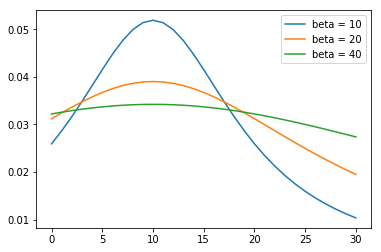

In [2]:
locations = range(31)
pmf_beta_10 = make_location_pmf(10, 10, locations, "beta = 10")
pmf_beta_20 = make_location_pmf(10, 20, locations, "beta = 20")
pmf_beta_40 = make_location_pmf(10, 40, locations, "beta = 40")
pmf_beta_10.plot_with([pmf_beta_20, pmf_beta_40])

In [3]:
alphas = range(31)
betas = range(1, 51)
locations = range(0, 31)
paint_ball = PaintBall(alphas, betas, locations)
paint_ball.update_set([15, 16, 18, 21])

1.9032915958108991e-06

alpha CI: (14.0, 21.0), beta CI: (5.0, 31.0)


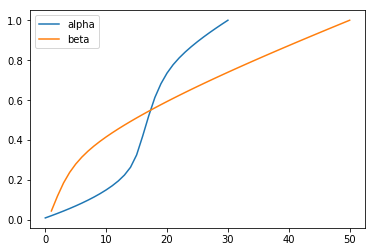

In [4]:
pmf_alpha = paint_ball.marginal(0)
pmf_beta = paint_ball.marginal(1)
print("alpha CI: {}, beta CI: {}"
      .format(pmf_alpha.credible_interval(50), pmf_beta.credible_interval(50)))

cdf_alpha = pmf_alpha.make_cdf(name="alpha")
cdf_beta = pmf_beta.make_cdf(name="beta")
cdf_alpha.plot_with([cdf_beta])

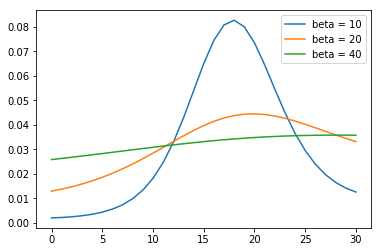

In [5]:
pmf_cond_beta_10 = paint_ball.conditional(0, 1, 10, name="beta = 10")
pmf_cond_beta_20 = paint_ball.conditional(0, 1, 20, name="beta = 20")
pmf_cond_beta_40 = paint_ball.conditional(0, 1, 40, name="beta = 40")
pmf_cond_beta_10.plot_with([pmf_cond_beta_20, pmf_cond_beta_40])

In [6]:
interval_25 = paint_ball.max_like_interval(percentage=25)
interval_50 = paint_ball.max_like_interval(percentage=50)
interval_75 = paint_ball.max_like_interval(percentage=75)

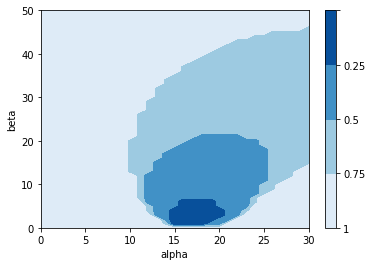

In [7]:
x = np.arange(0, 31, 1)
y = np.arange(0, 51, 1)
X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for x, y in interval_25:
    Z[y, x] += 1
for x, y in interval_50:
    Z[y, x] += 1
for x, y in interval_75:
    Z[y, x] += 1
    
fig = plt.contourf(X, Y, Z, 3, cmap=plt.cm.Blues, antialiased=False)
cbar = plt.colorbar(fig)
cbar.ax.set_yticklabels(['1', '0.75', '0.5', '0.25'])
plt.xlabel('alpha')
plt.ylabel('beta')
plt.show()